EECE454 - Introduction to Machine Learning System

# PA1-1: Linear Regression

made by Minkyu Kim, revised by Minjae Park


In this exercise, you need to implement linear regression and see it work on data.

Before starting this programming exercise, we strongly recommend to review the lecture notes used in this course.

To get started with the exercise, you need to download the dataset zip file and unzip its contents to the following directory: /content/drive/MyDrive/PA1/datasets

If you have any questions, please send a mail to TA(mjae.park@postech.ac.kr)

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

%cd /content/drive/MyDrive/PA1/datasets

# Instructions

This file contains codes that help you get started on the linear regression exercise. In this PA, you study how to implement linear regressor.

You need to complete the following parts (check the context list on the left side) of this exercise:

Linear Regression with Uni-variable
* Plot Data
* Cost Function
* Gradient Descent
* Prediction

Linear Regression with Multi-variables
* Feature Normalization
* Cost Function
* Gradient Descent
* Selecting learning rates
* Prediction (Gradient Descent)
* Ordinary Least Square (OLS)
* Prediction (OLS)

you do not need to change any code that "YOUR CODE HERE" does not exist.

*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission.

# Linear Regression

Linear regression is a linear model that assumes a linear relationship between the arbitrary input independent variables (x) and the single output dependent variable (y).

Our goal is to estimate the model parameter from training data of <$x_i, y_i$> pairs.

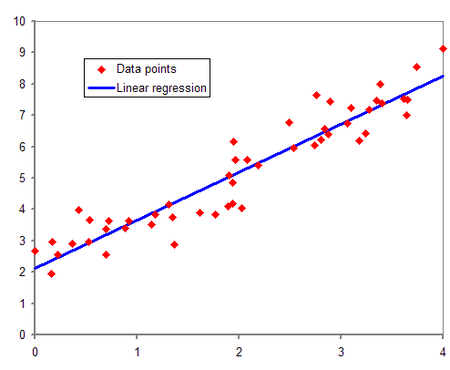

## Univariable

In this exercise, you'll implement a linear regression model with one variable to predict product sales based on the cost of TV advertisements.

Imagine you're the Marketing Strategy Team Leader, analyzing the relationship between ad spending and product sales.


### Data Load
The file pa1_data1.csv contains the dataset for our linear regression problem.

Each column denotes for Index, TV, Radio, Newspaper, and Sales.

This section, you need to load proper data ("TV", "Sales")

In [ ]:
import torch
def load_tv_sales(file_name):
    data = []
    with open(file_name, 'r') as f:

        for i, line in enumerate(f.readlines()):
            if i == 0:
                continue
            # ====================== YOUR CODE HERE ======================
            # Instructions: Load the TV advertisement costs and product sales data from the
            #               specified CSV file. Skip the header row, and then parse each line
            #               to extract the TV ad costs (2nd column) and sales data (5th column).
            #               Convert these values to floats and append them as a list [tv, sales]
            #               into the data list.
            #
            # Hint: Use strip() and split() for loading data from csv, you need to convert data to float data type.
            # Hint: Use append() to add data in list "data."        
            # Hint: Shape of data must be [200,2].   
            # ============================================================
            except ValueError:
                continue 
    data = torch.FloatTensor(data)
    return data

In [ ]:
data = load_tv_sales('./datasets/pa1_data1.csv')
X = data[:,0].unsqueeze(-1)
y = data[:,1].unsqueeze(-1)
m = y.size(0) # number of training examples

print("X shape : ", X.size()) # X shape must be [200,1]
print("y shape : ", y.size()) # y shape must be [200,1]

### Plot Data 
Before starting on any task, it is often useful to understand the data by visualizing it.

For this dataset, you can use a scatter plot to visualize the data since it has only two properties to plot (profit and population).

(Many other problems you will encounter in real life are multi-dimensional and can’t be plotted on a 2-d plot.)

Your visualized data look like the graph below:

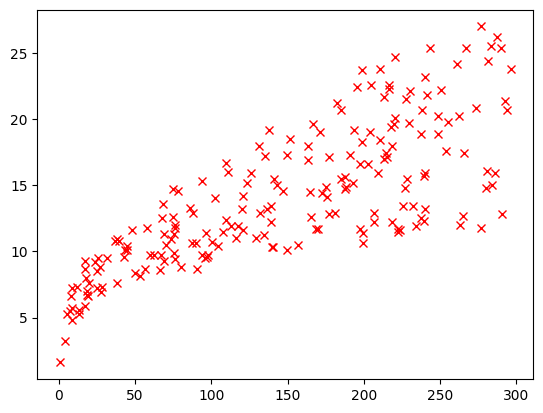

In [ ]:
import matplotlib.pyplot as plt
def plotData(X,y):
    #plotData plots the data points x and y into a new figure
    #   plotData(x,y) plots the data points and gives the figure axes labels of
    #   population and profit.

    # ====================== YOUR CODE HERE ======================
    # Instructions: Plot the training data into a figure using the
    #               "plt.figure" and "plt.plot" commands. Set the axes labels using
    #               the "plt.xlabel" and "plt.ylabel" commands. Assume the
    #               population and revenue data have been passed in
    #               as the x and y arguments of this function.
    #
    # Hint: You can use the 'rx' option with plot to have the markers
    #       appear as red crosses. Furthermore, you can make the
    #       markers larger by using plt.plot(..., 'rx', 'markersize=10', ...)
    # ============================================================

In [ ]:
plotData(X, y)

### Cost Function 

As you perform gradient descent to learn to minimize the cost function $J_\theta$, it is helpful to monitor the convergence by computing the cost.

In this section, you need to implement a function to calculate $J_\theta$ so you can check the convergence of your gradient descent implementation.


Define a loss function as $L(h_\theta(x,y)) = (y-h_\theta(x))^{2}$<br>


Our goal is to find the best linear function 𝜃 that minimizes $J(\theta) = \frac{1}{2n}\sum_{i=1}^n(y^{(i)}-h_\theta(x^{(i)}))^2$<br> where the hypothesis $h_{\theta}(x) = \theta^{\top}x = \theta_{0}+\theta_{1}x_{1}$ is given by the linear model.


Your next task is to complete the code below, which is a function that computes $J(\theta)$. As you are doing this, remember that the variables X and y are not scalar values but matrices whose rows represent the examples from the training set.

In [ ]:
import torch
def computeCost(X, y, theta):
    #computeCost compute cost for linear regression
    #   J = computeCost(X, y, theta) computes the cost of using theta as the
    #   parameter for linear regression to fit the data points in X and y

    # Initialize some useful values
    n = y.size(0)
    # You need to return the following variables correctly
    J = 0

    for i in range(n) :

      # ====================== YOUR CODE HERE ========================
      # Instructions: Compute the cost of a particular choice of theta
      #               You should set J to the cost.
      # ==============================================================

    J /= (2*n)

    return J

In [ ]:
raw_X = X
X = torch.cat((torch.ones(m,1), data[:,0].view(m,1)), dim=-1) # Add a column of ones to x

theta = torch.zeros((2, 1)).type(torch.FloatTensor) # initialize fitting parameters

# Some gradient descent settings
iterations = 1500
alpha = 1e-6

print('\nTesting the cost function ...\n')
# compute and display initial cost
J = computeCost(X,y,theta)
print('With theta = [[0],[0]]\nCost computed = ', J.item(), '\n')
print('Expected cost value (approx) 111.86\n')

# further testing of the cost function
theta = torch.Tensor([[5],[0.1]]).type(torch.FloatTensor)
J = computeCost(X, y, theta)
print('\nWith theta = [[-1],[2]]\nCost computed = ', J.item(), '\n')
print('Expected cost value (approx) 31.49\n')

### Gradient Descent 
Next, you need to implement gradient descent. The loop structure has been written for you, and you only need to supply the updates to $\theta$ within each iteration.

As you program, make sure you understand what you are trying to optimize and what is being updated.

Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not X and y.

That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing X or y.

One way to change these values is to use the batch gradient descent algorithm.

In batch gradient descent, each iteration performs<br>the update $\quad\theta_{j} := \theta_{j}-\alpha\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_{j}^{(i)} \quad$ (simultaneously update $\theta_{j}$ for all $j$)<br> With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that achieve the lowest cost $J(\theta)$.

In [ ]:
def gradientDescent(X, y, theta, alpha, num_iters):
  #gradientDescent performs gradient descent to learn theta
  #   theta, J_history = gradientDescent(X, y, theta, alpha, num_iters) updates theta by
  #   taking num_iters gradient steps with learning rate alpha

    # Initialize some useful values
    m = y.size(0)  # number of training examples
    J_history = torch.zeros(num_iters,1)

    for idx in range(num_iters):
      # ====================== YOUR CODE HERE ==============================
      # Instructions: Perform a single gradient step on the parameter vector
      #               theta.
      #
      # Hint: While debugging, it can be useful to print out the values
      #       of the cost function (computeCost) and gradient here.
      #
      # ====================================================================
      # Save the cost J in every iteration.
      J_history[idx] = computeCost(X, y, theta)

    return theta, J_history

In [ ]:
print('\nRunning Gradient Descent ...\n')
# run gradient descent
theta = torch.zeros(2, 1).type(torch.FloatTensor) # initialize fitting parameters
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

# print theta to screen
print('Theta found by gradient descent:\n')
print(f'{theta[0].item()}\n{theta[1].item()}')
print('Expected theta values (approx)\n')
print('0.0031\n0.0832\n\n')

A good way to verify that gradient descent is working correctly is to look
at the value of $J(\theta)$ and check that it is decreasing with each step. *gradientDescent* function calls *computeCost* on every iteration
and prints the cost.<br>

Assuming you have implemented *gradientDescent* and
*computeCost* correctly, your value of $J(\theta)$ should never increase and converge to a steady value by the end of the algorithm.

The plots look something like figure below:

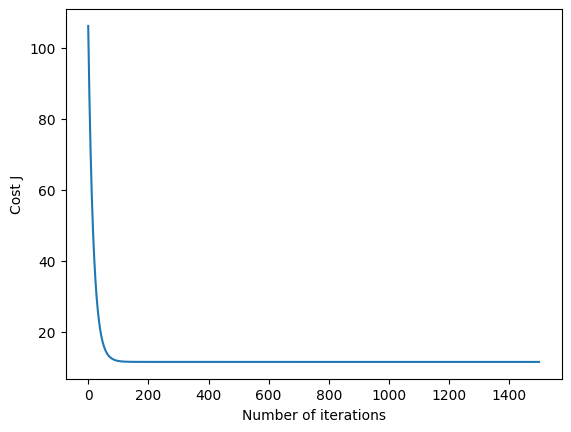

In [ ]:
plt.figure()
plt.plot(range(iterations), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

After Running Gradient Descent, Use your final parameters to plot the linear fit.

The result looks something like the figure below:

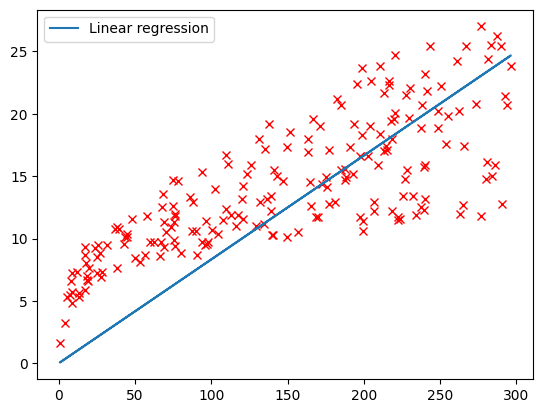

In [ ]:
# Plot the linear fit
plotData(X[:,1], y)
plt.plot(X[:,1], X @ theta, label='Linear regression')
plt.legend()
plt.show()

### Visualizing Cost function
To understand the cost function $J(\theta)$ better, Plot the cost over a 2-dimensional grid of $θ_0$ and $θ_1$ values.

**You don't need to code anything new for this part**, but you should understand how the code you have written already is creating these images.

In the next step, there is a code set up to calculate $J(\theta)$ over a grid of values using the *computeCost* function that you wrote.

After filling out *J_vals*, you will have a 2-D array of $J(\theta)$ values.

The script then uses these values to produce surface and contour plots of $J(\theta)$ using the surf and contour commands.

The plots look something like the figures below:<br>

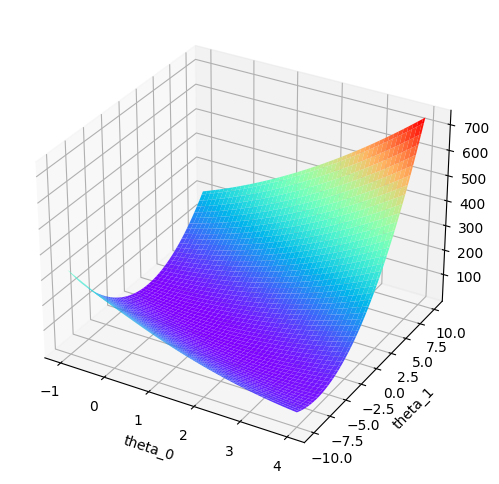 <br>
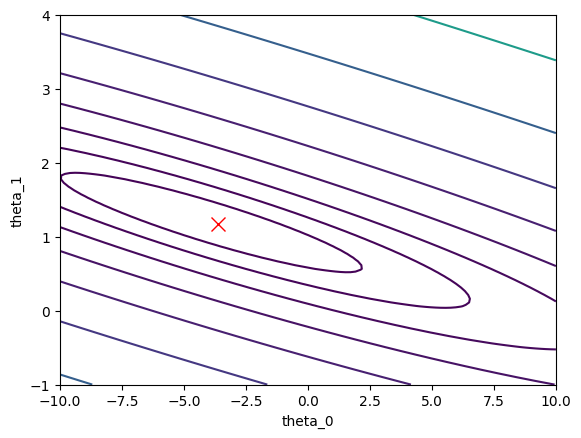

In [ ]:
print('Visualizing J(theta_0, theta_1) ...\n')

# Grid over which we will calculate J
theta0_vals = torch.linspace(-10, 10, steps=100)
theta1_vals = torch.linspace(-0.1, 0.5, steps=100)

# initialize J_vals to a matrix of 0's
J_vals = torch.zeros(theta0_vals.size(0), theta1_vals.size(0))

# Fill out J_vals
for i in range(theta0_vals.size(0)):
    for j in range(theta1_vals.size(0)):
        t = [theta0_vals[i], theta1_vals[j]]
        J_vals[i,j] = computeCost(X, y, t)

# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# Surface plot
# reference : https://matplotlib.org/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.html?highlight=plot_surface#mpl_toolkits.mplot3d.axes3d.Axes3D.plot_surface
fig = plt.figure(figsize=(8,6))
ax3d = fig.add_subplot(111,projection='3d')

X_grid,Y_grid = torch.meshgrid(theta0_vals,theta1_vals, indexing='ij')
Z = J_vals
ax3d.plot_surface(Y_grid, X_grid, Z, cmap='rainbow')
ax3d.set_xlabel('theta_0')
ax3d.set_ylabel('theta_1')

# Contour plot
# reference : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html?highlight=pyplot%20contour#matplotlib.pyplot.contour
plt.figure()
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
plt.contour(theta0_vals, theta1_vals, J_vals, torch.logspace(start=-2, end=3, steps=20))
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.plot(theta[0], theta[1], 'rx', markersize=10, linewidth=2)
plt.show()

The purpose of these graphs is to show you how $J(\theta)$ varies with changes in $\theta_0$ and θ$\theta_1$.

The cost function $J(\theta)$ is bowl-shaped and has a global minimum.

(This is easier to see in the contour plot than in the 3D surface plot).

This minimum is the optimal point for $\theta_0$ and $\theta_1$, and each step of gradient descent moves closer to this point.

## Discussion 

Unlike the example plots above, why does your result not reach the optimal point? Analyze this phenomenon and suggest methods for better regression. 

### Your Answer:

## Multivariables
In this part, you need to implement linear regression with multiple variables to predict the sales of the product.

Through this process you will be able to bring more accurate prediction. 

For implementing multivariable linear regression, you should bring more data like radio & newspaper advertisement price. 

### Data Load
Same as above in 1.1, you need to extract TV, sales and "radio" & "newspaper"

In [ ]:
import torch
def load_ad_sales(file_name):
    data = []
    with open(file_name, 'r') as f:

        for i, line in enumerate(f.readlines()):
            if i == 0:
                continue
            # ====================== YOUR CODE HERE ======================
            # Instructions: like you write load_tv_sales before, extract also tv and sales, and furthermore
            #               radio (3rd column) and newspaper (4th column)
            #               Convert these values to floats and append them as a list [tv, radio, newspaper, sales]
            #               into the data list.
            # Hint: Use strip() and split() for loading data from csv, you need to convert data to float data type.
            # Hint: Use append() to add data in list "data."        
            # Hint: Shape of data must be [200,4].   
            # ============================================================
    data = torch.FloatTensor(data)
    return data

In [ ]:
data = load_ad_sales('./datasets/pa1_data1.csv')
X = data[:, 0:3]
y = torch.Tensor(data[:, 3]).unsqueeze(-1)
m = y.size(0)

print("X shape : ", X.size())
print("y shape : ", y.size())

### 1.8 Feature Normalization (5pts)
The example starts by loading and displaying some values from this dataset. By looking at the values, note that the expenditures on TV, radio, and newspaper advertisements vary in scale.<br> Your task here is to complete the code in the cell below:

* **Subtract the mean value of each feature from the dataset.**
* **After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”**<br>

The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points lie within ±2 standard deviations of the mean); this is an alternative to taking the range of values (max-min). <br> **In Python, you can use the torch.std function to compute the standard deviation.**<br>

**The extra column of 1’s corresponding to x0 = 1 has not yet been added to X.**<br>

Do this for all the features, and your code should work with datasets of all sizes (any number of features/examples). Note that each column of matrix X corresponds to one feature.<br>

Implementation Note: When normalizing the features, it is important to store the values used for normalization—the mean value and the standard deviation used for the computations. After learning the parameters from the model, we often want to predict the sales from advertisement expenditures we have not seen before. Given a new x value (TV, radio, and newspaper advertisement expenditures), we must first normalize x using the mean and standard deviation that we had previously computed from the training set.

In [ ]:
def featureNormalize(X):
    #   featureNormalize Normalizes the features in X
    #   featureNormalize(X) returns a normalized version of X where
    #   the mean value of each feature is 0 and the standard deviation
    #   is 1. This is often a good preprocessing step to do when
    #   working with learning algorithms.'

    # You need to set these values correctly
    X_norm = X
    mu = torch.zeros(X.size(1))
    sigma = torch.zeros(X.size(1))

    # ====================== YOUR CODE HERE ===========================
    # Instructions: First, for each feature dimension, compute the mean
    #               of the feature and subtract it from the dataset,
    #               storing the mean value in mu. Next, compute the
    #               standard deviation of each feature and divide
    #               each feature by it's standard deviation, storing
    #               the standard deviation in sigma.
    #
    #               Note that X is a matrix where each column is a
    #               feature and each row is an example. You need
    #               to perform the normalization separately for
    #               each feature.
    #
    # Hint: You might find the 'torch.mean()' and 'torch.std()' functions useful.
    # =================================================================

    return X_norm, mu, sigma

In [ ]:
# Print out some data points
print('First 10 examples from the dataset: \n')

for i in range(10):
    print('x = ',X[i,:], ' y = ',y[i])

# Scale features and set them to zero mean
print('\nNormalizing Features ...\n')

X_norm, mu, sigma = featureNormalize(X)
X = X_norm

for i in range(10):
    print('x = ',X[i,:], ' y = ',y[i])

# Add intercept term to X
X = torch.cat((torch.ones(m,1), X), dim=1 ) # Add a column of ones to x

### Cost Function
Previously, you implemented the cost function on a univariate regression problem.

The only difference now is that you should not use for loop summation when you implement cost functions, but rather usefully vectorized X, y variables due to computational efficiency.

Our goal is to find the best linear function $\theta$ that minimizes $J(\theta) = \frac{1}{2m}(X\theta-\overrightarrow{y})^{\top}(X\theta-\overrightarrow{y})$ <br>

<br>where<br>

$X = \begin{bmatrix}
\hline
(x^{(1)})^{\top} \\
(x^{(2)})^{\top} \\
\vdots \\
(x^{(m)})^{\top} \\
\hline
\end{bmatrix}$

$\quad$

$\overrightarrow{y} = \begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(m)} \\
\end{bmatrix}$



In [ ]:
def computeCostMulti(X, y, theta):
    #   computeCostMulti computes cost for linear regression with multiple variables
    #   J = computeCostMulti(X, y, theta) computes the cost of using theta as the
    #   parameter for linear regression to fit the data points in X and y

    # Initialize some useful values
    m = y.size(0)  # number of training examples

    # You need to return the following variables correctly
    J = 0

    # ====================== YOUR CODE HERE ==============================
    # Instruction : Compute the cost of a particular choice of theta
    #               You should set J to the cost.
    #               You must not use for loop to compute cost function.
    #               Instead, use a fully vectorized form.
    #               The code used for loop would not be given any points.
    
    # ====================================================================

    return J

### Gradient Descent 
Previously, you implemented gradient descent on a univariate regression problem.

The only difference now is that there is one more feature in matrix X.

The hypothesis function and the batch gradient descent update rule remain unchanged.<br>

You need to complete the code in *gradientDescentMulti* function to implement gradient descent for linear regression with multiple variables.

In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    #   gradientDescentMulti Performs gradient descent to learn theta
    #   theta = gradientDescentMulti(x, y, theta, alpha, num_iters) updates theta by
    #   taking num_iters gradient steps with learning rate alpha

    # Initialize some useful values
    m = y.size(0) # number of training examples
    J_history = torch.zeros(num_iters, 1)

    for i in range(num_iters):

        # Save the cost J in every iteration
        J_history[i, 0] = computeCostMulti(X, y, theta)

        # ====================== YOUR CODE HERE =====================================
        # Instructions: Perform a single gradient step on the parameter vector theta.
        #               You must not use for loop to compute gradient descent.
        #               Instead, use fully vectorized form.
        #               the code using for loop would not be given any points.
        #
        # Hint: While debugging, it can be useful to print out the values
        #       of the cost function (computeCostMulti) and gradient here.
        # ===========================================================================

    return theta, J_history

A good way to verify that gradient descent is working correctly is to look at the value of $J(\theta)$  and check that it is decreasing with each step. *gradientDescentMulti* function calls *computeCostMulti* on every iteration and prints the cost.<br>

Assuming you have implemented *gradient descentMulti* and *computeCostMulti* correctly, your value of $J(\theta)$ should never increase and converge to a steady value by the end of the algorithm.<br>

Your convergence graph looks like below:

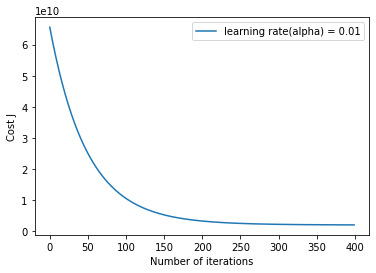<br>


In [ ]:
print('Running gradient descent ...\n')

# Choose some alpha value
alpha = 0.01
num_iters = 400

# Init Theta and Run Gradient Descent
theta = torch.zeros(4, 1)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# print the final loss

f_loss = computeCostMulti(X,y,theta)
print('final loss')
print(f_loss)

# Plot the convergence graph
plt.figure()
plt.plot(range(num_iters), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

In [ ]:
# print theta to screen
print('Theta found by gradient descent:\n')
print(theta, '\n')

print('Expected theta values (approx)\n')
print(' 13.7708\n 3.8605\n 2.6936\n 0.0871\n\n')

### Selecting learning rates 
In this part of the exercise, you need to try out different learning rates for the dataset and find a learning rate that converges quickly.

You can change the learning rate by changing the part of the code that sets the learning rate.

Call your gradientDescentMulti function and run gradient descent for about 50 iterations at the chosen learning rate.

The function also returns the history of $J(\theta)$ values in a vector.

After the last iteration, you are expected to plot the J values against the number of iterations.

If you picked a learning rate within a good range, your plot looks similar Figure below.

If your graph looks very different, especially if your value of $J(\theta)$ increases or even blows up, adjust your learning rate and try again.

We recommend trying values of the learning rate α on a log-scale, at multiplicative steps of about three times the previous value (i.e., 0.3, 0.1, 0.03, 0.01, and so on).

Define "alphas" as a list of learning late $\alpha$.

Run gradient descent until convergence to find the final values of $\theta$.

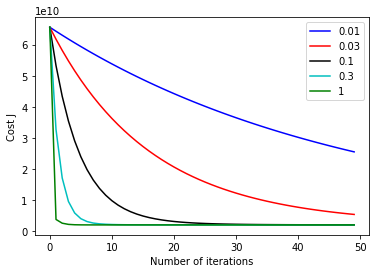

In [ ]:
# Recall that the first column of X is all-ones. Thus, it does not need to be normalized.
# ====================== YOUR CODE HERE ======================
# Instruction : Train the model with various learning rate = [0.01, 0.03, 0.1, 0.3, 1], then plot the figure like above.

# ============================================================

### Ordinary Least Square (OLS)
In the lecture 4, you learned that the closed-form solution to linear
regression is $\theta = (X^{\top}X)^{-1}X^{\top}\vec{y}.$<br>

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent.<br>

Complete the code to use the formula above to calculate $\theta$.

Remember that while you don’t need to scale your features, we still need to add a column of 1’s to the X matrix to have an intercept term $θ_0$.

In [ ]:
import torch
def OLS(X, y):
    #   OLS computes the closed-form solution to linear regression
    #   optimal_theta = OLS(X,y) computes the closed-form solution to linear
    #   regression using the ordinary least square

    optimal_theta = torch.zeros(4,1)

    # ====================== YOUR CODE HERE =============================
    # Instructions: Complete the code to compute the closed form solution
    #               to linear regression and put the result in theta.
    #
    #
    # HINT: use torch.linalg.inv for inverse matrix
    # ===================================================================

    return optimal_theta

In [ ]:
print('Solving with OLS...\n')

## Load Data
data = load_ad_sales('./datasets/pa1_data1.csv')
X = data[:, :3]
y = data[:, 3].unsqueeze(-1)
m = y.size(0)

# Add intercept term to X
X = torch.cat((torch.ones(m, 1), X), dim=1 ) # Add a column of ones to x

# Calculate the parameters from the normal equation
theta = OLS(X, y)

# Display normal equation's result
print('Theta computed from the OLS: \n')
print(theta, '\n')

print('Expected theta values (approx)\n')
print(' 2.9389e+00\n 4.5765e-02\n 1.8853e-01\n -1.0373e-03\n\n')

### Compute loss (OLS)

In [ ]:
loss = computeCostMulti(X,y,theta)
print('OLS loss')
print(loss)

## Discussion 

- Which method do we use when the number of dimension is large, Gradient Descent or Ordinary Least Square?

- What is the benefit of using feature normalization before Gradient Descent?

Your answer: